In [8]:
import os
import pickle
import dill
import yaml

from matplotlib import pyplot as plt

In [6]:
cd ../../../src

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


In [2]:
path = '../data/beerslaw/sequenced_simulations/simplestate_secondslstm/id_dictionary.pkl'
with open(path, 'rb') as fp:
    idd = pickle.load(fp)

In [9]:
map_path = '../data/beerslaw/experiment_keys/permutation_maps/vector_binary.yaml'
with open(map_path) as fp:
    ranking_map = yaml.load(fp, Loader=yaml.FullLoader)

In [38]:
counter = {key:{'time':0, 'times':[], 'instance': 0} for key in ranking_map['labels']}
for seq_info in idd['sequences']:
    # Read sequences
    sequence_path = idd['sequences'][seq_info]['path']
    sequence_path = sequence_path.replace('../data', '../data/beerslaw')
    with open(sequence_path, 'rb') as fp:
        simseq = pickle.load(fp)
        
    # Get the counts
    time = 0
    for i, seq in enumerate(simseq['sequence']):
        if seq[3] != 0:
            time += (simseq['end'][i] - simseq['begin'][i])
        else:
            break
            
    label = ranking_map['map'][simseq['permutation']]
    counter[label]['time'] += time
    counter[label]['times'].append(time)
    counter[label]['instance'] += 1
        
    

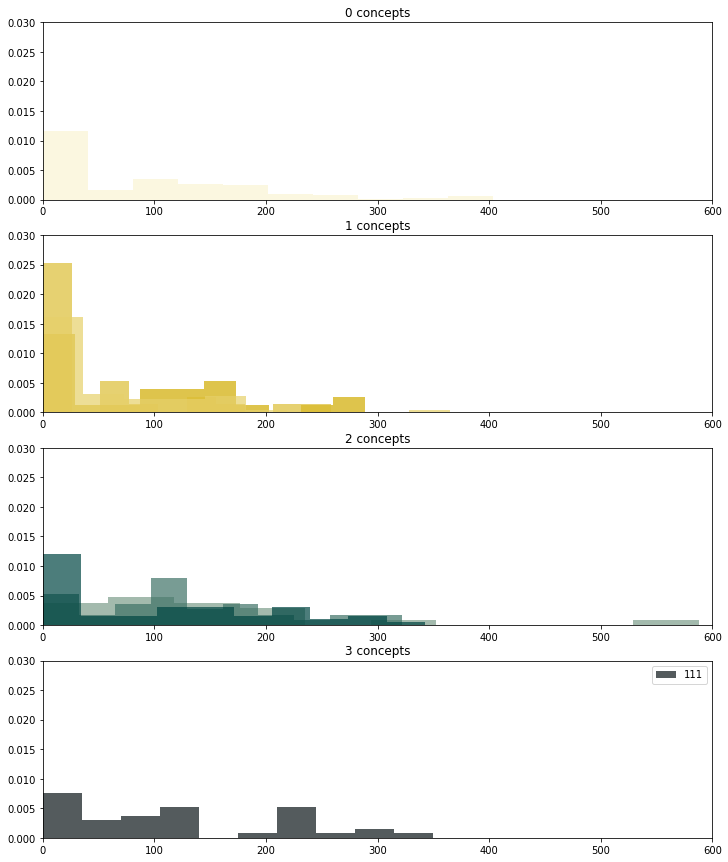

In [43]:
colour_map = {
    '000': '#FAF4D3',
    '001': '#E6D06A',
    '010': '#DCBE35',
    '100': '#D1AC00',
    '011': '#004643',
    '101': '#3F7267',
    '110': '#7D9D8B',
    '111': '#0C1618'
}

fig, axes = plt.subplots(4, 1, figsize=(12, 15))
for label in counter:
    ax_nr = int(label[0]) + int(label[1]) + int(label[2])
    axes[ax_nr].hist(counter[label]['times'], label=label, color=colour_map[label], alpha=0.7, density=True)
    
for i in range(4):
    axes[i].set_title('{} concepts'.format(i))
    axes[i].set_xlim([0, 600])
    axes[i].set_ylim([0, 0.030])

plt.legend()
plt.show()

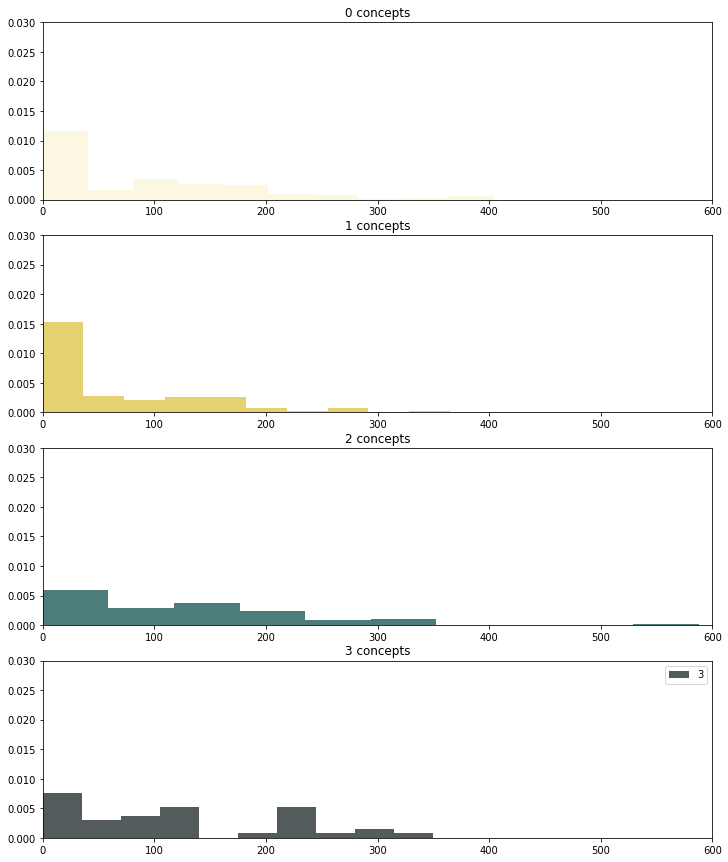

In [47]:
colour_map = {
    '000': '#FAF4D3',
    '0': '#FAF4D3',
    '001': '#E6D06A',
    '010': '#DCBE35',
    '100': '#D1AC00',
    '1': '#DCBE35',
    '011': '#004643',
    '101': '#3F7267',
    '110': '#7D9D8B',
    '2': '#004643',
    '111': '#0C1618',
    '3': '#0C1618'
}

counter_aggregated = {
    '0': counter['000']['times'],
    '1': counter['001']['times'] + counter['010']['times'] + counter['100']['times'],
    '2': counter['011']['times'] + counter['101']['times'] + counter['110']['times'],
    '3': counter['111']['times']
}

fig, axes = plt.subplots(4, 1, figsize=(12, 15))
for label in counter_aggregated:
    axes[int(label)].hist(counter_aggregated[label], label=label, color=colour_map[label], alpha=0.7, density=True)
    
for i in range(4):
    axes[i].set_title('{} concepts'.format(i))
    axes[i].set_xlim([0, 600])
    axes[i].set_ylim([0, 0.030])

plt.legend()
plt.show()